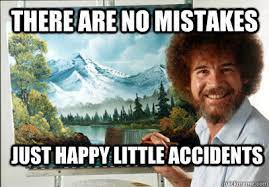

In [14]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Pick an image you like

Make sure that it is a color photograph, not some graphic or comic!

## Load the image in color and visualize it

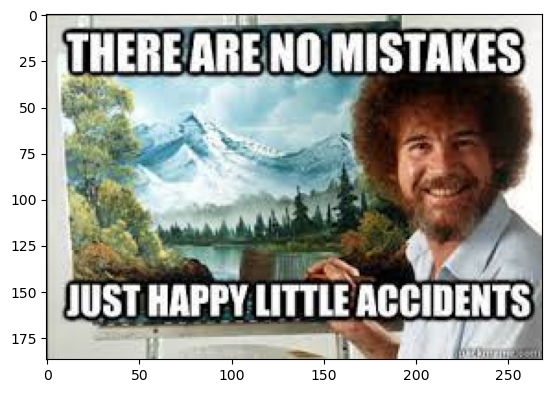

In [15]:
img = mpimg.imread('bob_ross.jpg')
plt.imshow(img)

## Have a look at to and get a visual feeling of its characteristics. What values would you expect from the image?

Da die Helligkeit ziemlich gleichmäßig verteilt ist, wäre den Mittelwert ungefähr beim 150.

Es gibt nur wenig sehr hellen oder sehr dunklen Bereichen, der Histogramm wird also eher um das Mittel größere Wahrscheinlichkeiten haben (gleichverteilt oder flächere Normalverteilung).

Entropie ist gefühlt um 4, da es viele Farbtöne gleichmäßig benutzt, aber Kompression könnte sie beeinflussen (wenn sie weniger Farben benutzt).

# Write a function that converts the RGB image into a greyscale image based on the intensity average

For the rest of this practical course, work with the greyscale version

In [16]:
def get_grayscale(img):
    return np.round(np.mean(img, axis=2)).astype(int)

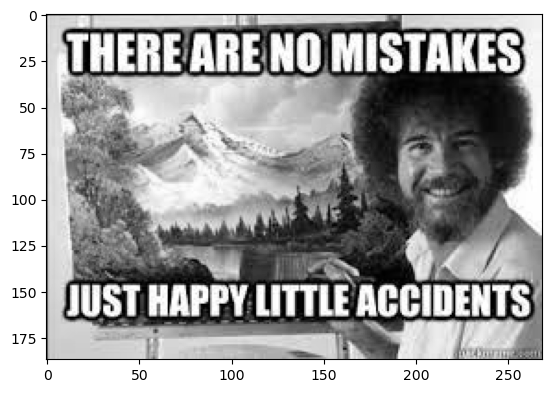

In [17]:
gr_img = get_grayscale(img)
plt.imshow(get_grayscale(img), cmap="gray")

# Write a function that calculates the mean and test it on your image

In [18]:
def get_mean(img):
    return np.mean(img)

In [19]:
get_mean(gr_img)

141.268890523428

# Write a function that calculates the mean square deviation and test it on your image

In [20]:
def get_std(img):
    return np.std(img)

In [21]:
get_std(gr_img)

80.82957462293878

# Histogram

## Write a function to plot the histogram of your image

<BarContainer object of 255 artists>

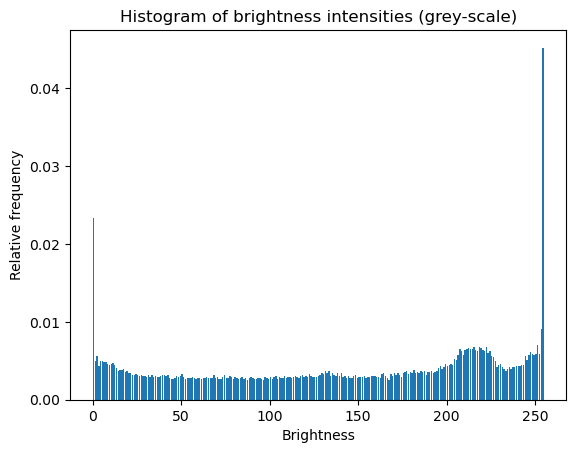

In [22]:
histogram, bins = np.histogram(img, density=True, bins=255)
bin_centers = [(i1 + i2) / 2 for i1, i2 in zip(bins[:-1], bins[1:])]
plt.title("Histogram of brightness intensities (grey-scale)")
plt.xlabel("Brightness")
plt.ylabel("Relative frequency")
plt.bar(bin_centers, histogram)


## Add plotting the cumulative frequencies to the histogram function

<BarContainer object of 255 artists>

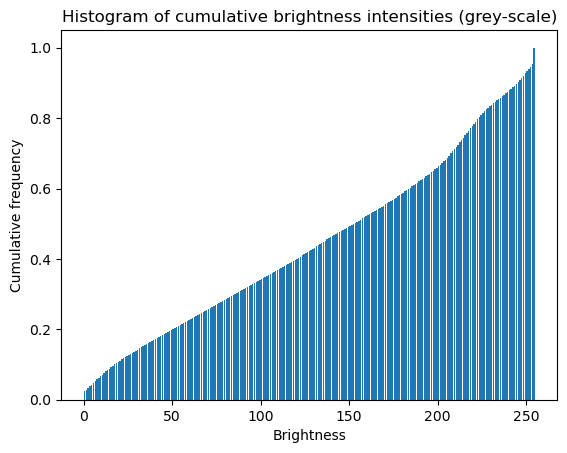

In [23]:
histogram, bins = np.histogram(img, density=True, bins=255)
bin_centers = [(i1 + i2) / 2 for i1, i2 in zip(bins[:-1], bins[1:])]
plt.title("Histogram of cumulative brightness intensities (grey-scale)")
plt.xlabel("Brightness")
plt.ylabel("Cumulative frequency")
plt.bar(bin_centers, np.cumsum(histogram))

## Update the function to return the frequencies

<BarContainer object of 255 artists>

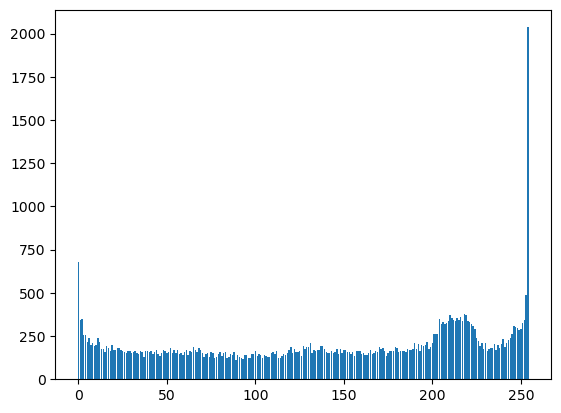

In [24]:
def get_frequencies(img):
    return np.histogram(img, bins=255)[0]

frequencies = get_frequencies(gr_img)
plt.bar(np.arange(0, 255, 1), frequencies)

# Write a function that sets all pixels to a given values based on a given threshold and test it on your image

In [25]:
gr_img.max()

255

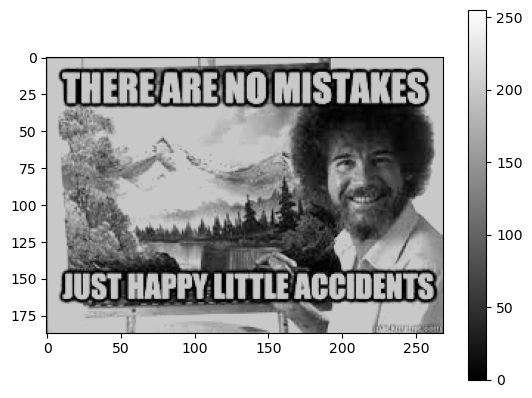

In [26]:
def set_max(img, max_value):
    filtered = img.copy()
    filtered[img > max_value] = max_value
    return filtered

def set_min(img, min_value):
    filtered = img.copy()
    filtered[img < min_value] = min_value
    return filtered

high_brightness_filter = set_max(gr_img, 200)
plt.imshow(high_brightness_filter, cmap="gray", vmax=255)
plt.colorbar()

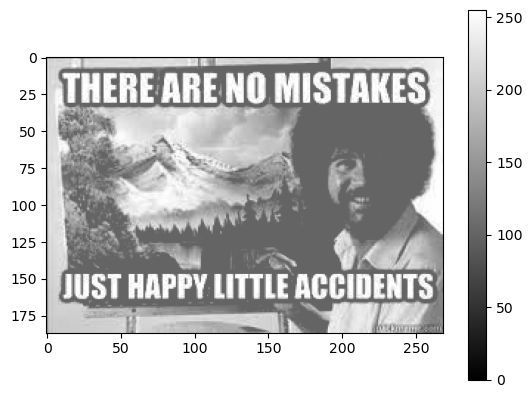

In [27]:
low_brightness_filter = set_min(gr_img, 100)
plt.imshow(low_brightness_filter, cmap="gray", vmin=0, vmax=255)

plt.colorbar()

# Write a function that calculates the entropy based on the frequencies returned from the histogram and test it on your image

In [28]:
def get_entropy(img):
    relative_frequencies = np.histogram(img, bins=255, density=True)[0]
    return -np.sum(relative_frequencies * np.log2(relative_frequencies))

entropy = get_entropy(gr_img)
entropy

7.832123352580327

# Write a function that linear normalizes an image and test it on your image

## Implement a naive version and measure the time it takes on your test image

## Change your function to use a Look-up-Table and see if it gets faster

In [29]:
from functools import wraps
from time import time

def memoize(func):
    cache = {}

    @wraps(func)
    def wrapper(*args, **kwargs):
        key = str(args) + str(kwargs)
        
        if key not in cache:
            cache[key] = func(*args, **kwargs)
        
        return cache[key]
    
    return wrapper


def linear_transform_single(img, c1, c2): 
    transformed = c2 * img + c1 * c2
    return max(0, min(255, transformed))


@memoize
def linear_transform_single_memo(img, c1, c2): 
    transformed = c2 * img + c1 * c2

    return max(0, min(255, transformed))


def linear_transform_np(img, c1, c2): 
    transformed = c2 * img + c1 * c2
    transformed[transformed > 255] = 255
    transformed[transformed < 0] = 0
    return transformed


def linear_transform_lookup(img, c1, c2):
    transformed_lookup = c2 * np.arange(0, 256, step=1) + c1 * c2
    transformed_lookup[transformed_lookup > 255] = 255
    transformed_lookup[transformed_lookup < 0] = 0
    
    return transformed_lookup[img.astype(int)]

In [30]:
def apply_to_arr(arr, func, *args, **kwargs):
    new_arr = arr.copy()
    for i, row in enumerate(arr):
        for j, value in enumerate(row):
            new_arr[i, j] = func(value, *args, **kwargs)
    return new_arr

## Timing linear transformation results:

In [31]:
print("Array operations:")
%timeit linear_transformed_np = linear_transform_np(gr_img, -30, 1.5)

print("\nArray operations with lookup table:")
%timeit linear_transformed_np = linear_transform_lookup(gr_img, -30, 1.5)
print("\nArray vectorizing (for loop):")
%timeit linear_transformed_single = apply_to_arr(gr_img, linear_transform_single, -30, 1.5)

print("\nMemoized vectorizing:")
%timeit linear_transformed_single_memo = apply_to_arr(gr_img, linear_transform_single_memo, -30, 1.5)

Array operations:


741 µs ± 92.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Array operations with lookup table:
502 µs ± 130 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Array vectorizing (for loop):
355 ms ± 76.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Memoized vectorizing:
312 ms ± 83.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Lookup table is really faster than normal array computation! Hooray!!

### Beispiele aus der Vorlesung (Normalisierung, Gamma-Transformation)

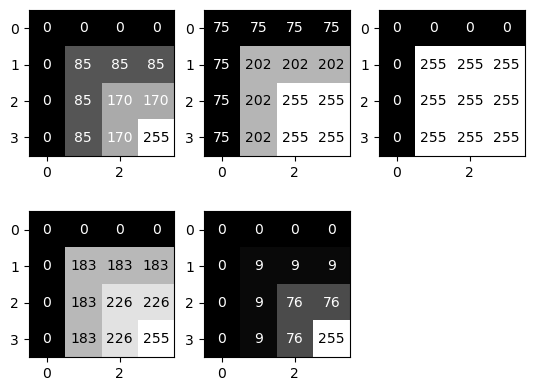

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# Beispiel aus der Vorlesung
test_img = np.array(
    [
        [0, 0, 0, 0],
        [0, 85, 85, 85],
        [0, 85, 170, 170],
        [0, 85, 170, 255]
    ]
)

def min_max(img):
    return (img - np.min(img)) * 255 / (np.max(img) - np.min(img))

def linear_transform(img, c1, c2): 
    transformed = c2 * img + c1 * c2
    transformed[transformed > 255] = 255
    transformed[transformed < 0] = 0
    return transformed

def gamma_transform(img, gamma):
    return 255 * (img/255) ** gamma

def get_color(val):
    if val <= 170:
        return "w"
    else:
        return "black"

def plot_vals(axis, img):
    for i, row in enumerate(img):
        for j, value in enumerate(row):
            axis.text(i, j, int(np.round(value)), ha="center", va="center", color=get_color(value))


plt.subplot(2, 3, 1)
plt.imshow(test_img, cmap="gray")
plot_vals(plt, test_img)

plt.subplot(2, 3, 2)
second_linear = linear_transform(test_img, 50, 1.5)
plt.imshow(second_linear, cmap="gray")
plot_vals(plt, second_linear)

plt.subplot(2, 3, 3)
third_linear = linear_transform(test_img, 0, 5)
plt.imshow(third_linear, cmap="gray")
plot_vals(plt, third_linear)


# Gamma Transform
ax = plt.subplot(2, 3, 4)
first_gamma = gamma_transform(test_img, 0.3)
ax.imshow(first_gamma, cmap="gray")
plot_vals(ax, first_gamma)

plt.subplot(2, 3, 5)
second_gamma = gamma_transform(test_img, 3)
plt.imshow(second_gamma, cmap="gray")
plot_vals(plt, second_gamma)


#plt.colorbar()